# Εργασία 4

### Μέρος Α

Ερώτημα 1

In [4]:
# we import all our necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

df = pd.read_csv('wine-missing.csv')

df.describe(include='all')


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


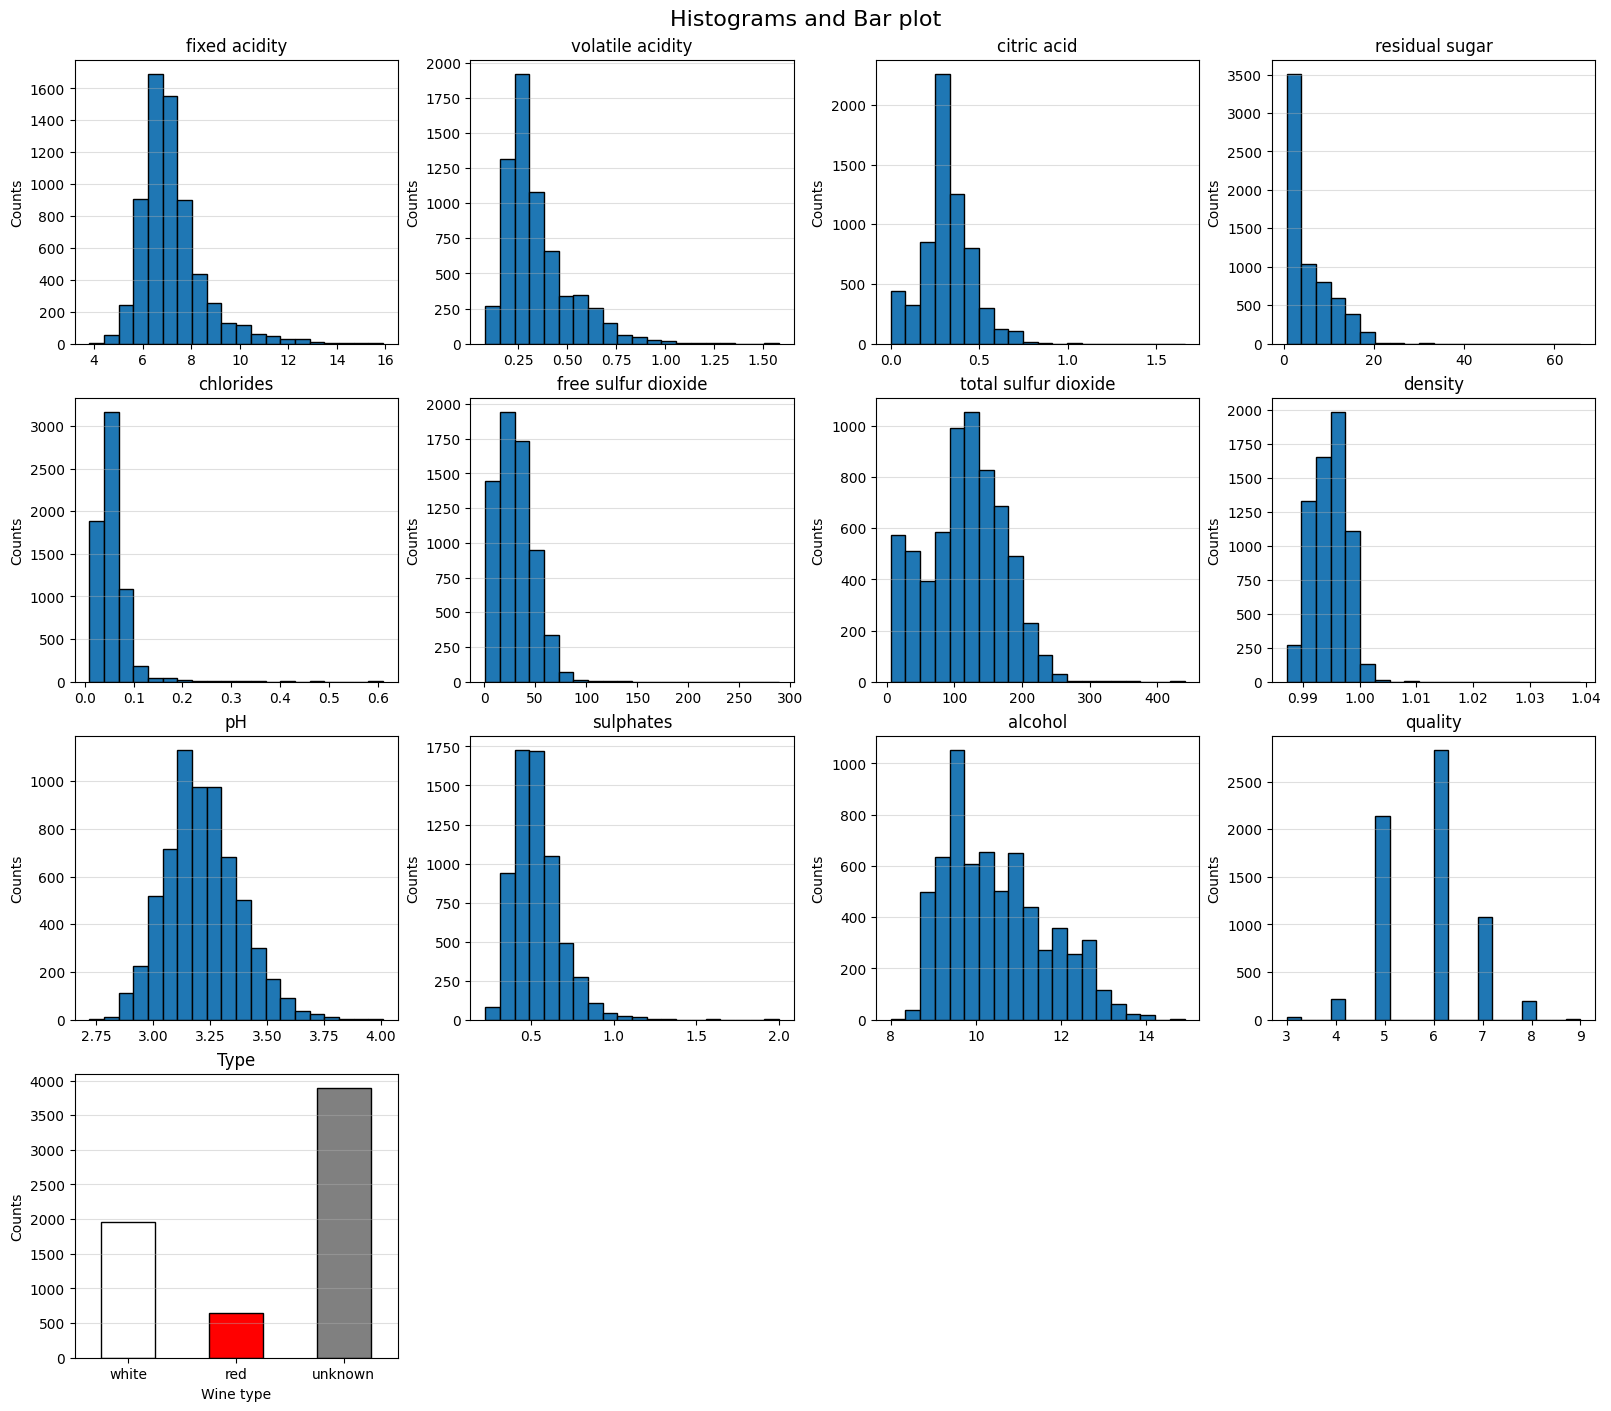

In [5]:
#we create our histograms and bar plot
numeric_columns = [col for col in df.columns if col != 'type']

fig, axes = plt.subplots(4, 4, figsize=(16, 14), constrained_layout=True)
axes = axes.flatten()

fig.suptitle("Histograms and Bar plot", fontsize=16)

for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col].dropna(), bins=20, edgecolor='black')
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("Counts", fontsize=10)
    axes[i].grid(axis='y', alpha=0.4)

type_order = ["white", "red", "unknown"]
type_counts = df['type'].fillna('unknown').value_counts().reindex(type_order, fill_value=0)

bar_ax = axes[len(numeric_columns)]
type_counts.plot(kind="bar",
                 color=["white", "red", "grey"],
                 edgecolor="black",
                 ax=bar_ax)

bar_ax.set_title("Type", fontsize=12)
bar_ax.set_xlabel("Wine type", fontsize=10)
bar_ax.set_ylabel("Counts", fontsize=10)
bar_ax.set_xticklabels(type_order, rotation=0)
bar_ax.grid(axis='y', alpha=0.4)

for a in range(len(numeric_columns) + 1, len(axes)):
    fig.delaxes(axes[a])

plt.show()


Ερώτημα 2

In [6]:
type_012 = {"white": 0, "red": 1, "unknown": 2}
df['type_new'] = df['type'].fillna('unknown').map(type_012)

x = df.drop(columns=['type', 'type_new']).to_numpy()
y = df['type_new'].to_numpy()

print("x:", x.shape)
print("y:", y.shape)


x: (6497, 12)
y: (6497,)


Ερώτημα 3

In [7]:
set_known = df['type'].isin(['white', 'red'])
set_unknown = df['type'].isna() | (df['type'] == 'unknown')

x_known = df.loc[set_known, df.columns != 'type'].to_numpy()
y_known = df.loc[set_known, 'type'].map({'white': 0, 'red': 1}).to_numpy()

x_unknown = df.loc[set_unknown, df.columns != 'type'].to_numpy()

print("x_known:", x_known.shape)
print("y_known:", y_known.shape)
print("x_unknown:", x_unknown.shape)


x_known: (2599, 13)
y_known: (2599,)
x_unknown: (3898, 13)


Ερώτημα 4

In [8]:
# we do the split train test
x_train, x_test, y_train, y_test = train_test_split(
    x_known,
    y_known,
    test_size=0.3,
    random_state=42,
    stratify=y_known)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)



x_train: (1819, 13)
y_train: (1819,)
x_test: (780, 13)
y_test: (780,)


Ερώτημα 5

In [9]:
#we train our classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred  = rf.predict(x_test)

metrics = {
    "accuracy": (accuracy_score, "Accuracy"),
    "f1": (f1_score, "F1-score"),
    "precision": (precision_score, "Precision"),
    "recall": (recall_score, "Recall")}

print("The metrics for the train set")
for a, (func, name) in metrics.items():
    if a in ["f1", "precision", "recall"]:
        score = func(y_train, y_train_pred, average="binary")
    else:
        score = func(y_train, y_train_pred)
    print(f"{name}: {score:.2f}")

print("The metrics of the test set")
for a, (func, name) in metrics.items():
    if a in ["f1", "precision", "recall"]:
        score = func(y_test, y_test_pred, average="binary")
    else:
        score = func(y_test, y_test_pred)
    print(f"{name}: {score:.2f}")


The metrics for the train set
Accuracy: 1.00
F1-score: 1.00
Precision: 1.00
Recall: 1.00
The metrics of the test set
Accuracy: 1.00
F1-score: 1.00
Precision: 1.00
Recall: 1.00


Στο σύνολο δεδομένων που έχουμε, περισσότερο αντιπροσωπευτική μετρική είναι το F1, καθώς τα λευκά και κόκκινα κρασιά έχουν μεγάλη διαφορά σε αριθμό, δηλαδή οι κλάσεις αυτές είναι μη ισορροπημένες. Επειδή το F1 λοιπόν λαμβάνει υπόψιν του και τα false negatives/false positives είναι πιο αξιόπιστο και αντιπροσωπευτικό. Από την άλλη η accuracy δίνει μόνο το ποσοστό των σωστών προβλέψεων στο σύνολο των δεδομένων και δεν τα πάει καλά με μη ισορροπημένες κλάσεις, όπως και έχουμε στο συγκεκριμένο dataset.

Ερώτημα 6

In [10]:
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(x_train, y_train)

y_train_pred_balanced = rf_balanced.predict(x_train)
y_test_pred_balalanced  = rf_balanced.predict(x_test)

metrics = {
    "accuracy": (accuracy_score, "Accuracy"),
    "f1": (f1_score, "F1-score"),
    "precision": (precision_score, "Precision"),
    "recall": (recall_score, "Recall")}

print("The metrics for the train set")
for a, (func, name) in metrics.items():
    if a in ["f1", "precision", "recall"]:
        score = func(y_train, y_train_pred_balanced, average="binary")
    else:
        score = func(y_train, y_train_pred_balanced)
    print(f"{name}: {score:.2f}")

print("The metrics of the test set")
for a, (func, name) in metrics.items():
    if a in ["f1", "precision", "recall"]:
        score = func(y_test, y_test_pred_balalanced, average="binary")
    else:
        score = func(y_test, y_test_pred_balalanced)
    print(f"{name}: {score:.2f}")

The metrics for the train set
Accuracy: 1.00
F1-score: 1.00
Precision: 1.00
Recall: 1.00
The metrics of the test set
Accuracy: 1.00
F1-score: 1.00
Precision: 1.00
Recall: 1.00


Σύμφωνα με το documentation, η παράμετρος class_weight='balanced' προσαρμόζει τα βάρη των κλάσεων (λευκό κόκκινο κρασί) ώστε οι λιγότερο αντιπροσωπευτικές κλάσεις, όπως εδώ το κόκκινο κρασί, να έχουν μεγαλύτερο βάρος κατά την διαδικασία της εκπαίδευσης.

Ερώτημα 7

In [11]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)

print("y_unknown_proba:", y_unknown_proba.shape)


print("Probabilities for the first 10 samples:")
print(y_unknown_proba[:10])

y_unknown_proba: (3898, 2)
Probabilities for the first 10 samples:
[[0.26 0.74]
 [0.33 0.67]
 [0.33 0.67]
 [0.22 0.78]
 [0.26 0.74]
 [0.28 0.72]
 [0.27 0.73]
 [0.25 0.75]
 [0.26 0.74]
 [0.2  0.8 ]]


Βλέπουμε πως όλα τα πρώτα 10 δείγματα έχουν πολύ μεγαλύτερη πιθανότητα να είναι κόκκινο κρασί, οπότε το μοντέλο μας πιθανότατα να ταξινομεί πολλά από τα unknown δείγματα ως κόκκινα.

Ερώτημα 8

In [12]:
proba_df = pd.DataFrame(y_unknown_proba, columns=["white", "red"])
y_unknown_pred = np.array(["unknown"] * len(proba_df))
y_unknown_pred[proba_df["red"] > 0.65] = "red"
y_unknown_pred[proba_df["red"] < 0.35] = "white"

print(y_unknown_pred[:10])


['red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red']


Ερώτημα 9

In [13]:
#there are also unkwown labels so we want to keep the red and white ones
items_labeled = y_unknown_pred != "unknown"

x_unknown_labeled = x_unknown[items_labeled]
y_unknown_labeled = y_unknown_pred[items_labeled]

# we need to turn the labels white and red into 0 and 1
label_map = {"white": 0, "red": 1}
y_unknown_labeled_num = np.array([label_map[v] for v in y_unknown_labeled])

# so now we concatenate them all together
x_train_aug = np.vstack([x_train, x_unknown_labeled])
y_train_aug = np.concatenate([y_train, y_unknown_labeled_num])

#we train the new model
rf_final = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_final.fit(x_train_aug, y_train_aug)

# trying to find the accurary on train/test sets of the initial dataset
y_train_pred_final = rf_final.predict(x_train)
y_test_pred_final  = rf_final.predict(x_test)
train_acc = accuracy_score(y_train, y_train_pred_final)
test_acc  = accuracy_score(y_test, y_test_pred_final)

print("The accuracy of the final train is:", train_acc)
print("The accuracy of the final test is: ", test_acc)

The accuracy of the final train is: 1.0
The accuracy of the final test is:  1.0


Ερώτημα 10

In [14]:
#we copy the initial train unknown data
x_train_new = x_train.copy()
y_train_new = y_train.copy()
x_unknown_new = x_unknown.copy()

threshold_low  = 0.35
threshold_high = 0.65

iteration = 1

while True:
    print(f"Iteration {iteration}")
    print(f"The unknown samples that remain still are: {len(x_unknown_new)}")

    if len(x_unknown_new) == 0:
        print("No unknown samples left. Stopping.")
        break

    # we are training the new model
    rf = RandomForestClassifier(random_state=42, class_weight='balanced')
    rf.fit(x_train_new, y_train_new)

    # we dind the probabilities of the red in the unknowns
    y_unknown_proba = rf.predict_proba(x_unknown_new)[:, 1]

    # we create labels and give the label -1 if the data is still unknown while 1 means red and 0 white
    y_unknown_pred = np.full(len(x_unknown_new), -1)
    y_unknown_pred[y_unknown_proba > threshold_high] = 1
    y_unknown_pred[y_unknown_proba < threshold_low]  = 0

    # we choose data with assigned label
    mask_new_labels = (y_unknown_pred != -1)

    # if we dont have new high confidence samples then we stop the iteration
    if mask_new_labels.sum() == 0:
        print("There are no more high confidence samples")
        break

    # we add new samples in the train set
    x_new = x_unknown_new[mask_new_labels]
    y_new = y_unknown_pred[mask_new_labels]

    print(f"The new high-confidence samples we add to the training: {len(x_new)}")

    # we update the train set
    x_train_new = np.vstack([x_train_new, x_new])
    y_train_new = np.concatenate([y_train_new, y_new])

    # we exclude them from the unknown set
    mask_keep = (y_unknown_pred == -1)
    x_unknown_new = x_unknown_new[mask_keep]


    iteration += 1

print("The self training is done")
print(f"The final train size is: {len(x_train_new)}")
print(f"The final unknown left is: {len(x_unknown_new)}")


Iteration 1
The unknown samples that remain still are: 3898
The new high-confidence samples we add to the training: 3850
Iteration 2
The unknown samples that remain still are: 48
The new high-confidence samples we add to the training: 48
Iteration 3
The unknown samples that remain still are: 0
No unknown samples left. Stopping.
The self training is done
The final train size is: 5717
The final unknown left is: 0


### Μέρος Β

Ερώτημα 1

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

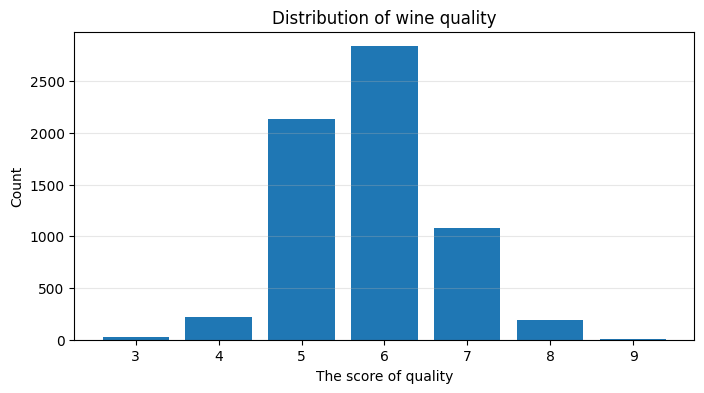

Percentages of quality(%):
quality
3     0.46
4     3.32
5    32.91
6    43.65
7    16.61
8     2.97
9     0.08
Name: count, dtype: float64


In [17]:
# importing all the packages we need one by one
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree, export_text
import graphviz
from sklearn.tree import export_graphviz


#loading our csv
df = pd.read_csv("wine-full.csv")

#seeing the first five results
print(df.head())

# we are sorting the variable quality
quality_counts = df['quality'].value_counts().sort_index()
print("Counts of quality:")
print(quality_counts)

#making the bar plot for the quality sorting
plt.figure(figsize=(8,4))
plt.bar(quality_counts.index.astype(str), quality_counts.values)
plt.xlabel("The score of quality")
plt.ylabel("Count")
plt.title("Distribution of wine quality")
plt.grid(axis='y', alpha=0.3)
plt.show()

#showing the percentages
quality_percent = (quality_counts / len(df) * 100).round(2)
print("Percentages of quality(%):")
print(quality_percent)


Το σετ δεδομένων μας αποτελείται από 6.497 εγγραφές. Σύμφωνα με την ποιότητα το σκορ κυμαίνεται από 3-9, και με βάση τον πίνακα παρατηρούμε πως τα περισσότερα δείγματα ανήκουν στα σκορ 5,6 και 7 (5    2138, 6    2836, 7    1079). Τα υπόλοιπα σκορ, όπως το 3 και το 9 εμφανίζονται αμιδρά. Αυτό σημαίνει ότι η μεταβλητή της ποιότητας είναι μη ισορροπημένη, πράγμα που το βλέπουμε και από το ραβδόγραμμα.

Ερώτημα 2

type
white    4898
red      1599
Name: count, dtype: int64
Mean quality of white wine: 5.87790935075541
Mean quality of red wine: 5.6360225140712945


/tmp/ipython-input-3930945881.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


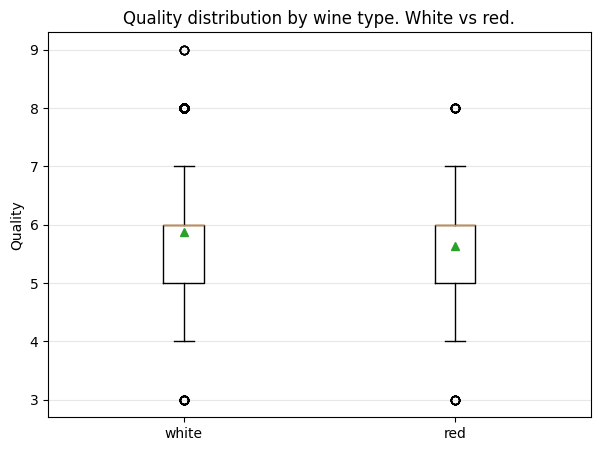

Mann–Whitney U test:
U-statistic: 4520388.0
p-value: 3.6343410707988e-23


In [19]:
#just checking the values of type
print(df["type"].value_counts())

#trying to find the mean of quality in every type (aka white and red)
mean_white = df.loc[df['type'] == 'white', 'quality'].mean()
mean_red   = df.loc[df['type'] == 'red',   'quality'].mean()

print("Mean quality of white wine:", mean_white)
print("Mean quality of red wine:",   mean_red)

#creating the boxplot to compare the wines
plt.figure(figsize=(7,5))
plt.boxplot(
    [df.loc[df['type']=='white','quality'],
     df.loc[df['type']=='red','quality']],
    labels=['white','red'],
    showmeans=True
)
plt.ylabel("Quality")
plt.title("Quality distribution by wine type. White vs red.")
plt.grid(axis='y', alpha=0.3)
plt.show()

#using the Mann–Whitney U test
white_q = df.loc[df['type']=='white','quality']
red_q   = df.loc[df['type']=='red','quality']

u_stat, p_value = mannwhitneyu(white_q, red_q, alternative='two-sided')

print("Mann–Whitney U test:")
print("U-statistic:", u_stat)
print("p-value:", p_value)


Για να συγκρίνω την ποιότητα των κρασιών (λευκά και κόκκινα), υπολόγισα την μέση τους τιμή στην ποιότητα σε κάθε κατηγορία και βρήκα τις εξής τιμές: Το λευκό έχει 5,87 και το κόκκινο 5,63. Συμπαιρένω πως το λευκό κρασί έχει ελαφρά μεγαλύτερη μέση ποιότητα. Από το boxplot βλέπουμε μάλιστα ότι έχουν το ίδιο εύρος τιμών αλλά το λευκό έχει υψηλοτερο μέσο.
Στην συνέχεια, καθώς όπως βρήκαμε στην προηγούμενη άσκηση τα δείγματα μας δεν είναι ισορροπημένα, χρησιμοποιούμε για στατιστικό έλεγχο το mann-whitney u test, από το οποίο προκύπτει πως p value είναι εξαιρετικά πολύ μικρό και σχεδόν ίσο με το 0, γεγονός που σημαίνει πως τα δύο γκρουπ έχουν σημαντικές διαφορές μεταξύ τους.
Συμπερασματικά, τα λευκά κρασιά έχουν καλύτερη ποιότητα.

Ερώτημα 3

Για να μπορέσουμε να απαντήσουμε ποιο κρασί έχει μεγαλύτερη ποιότητα πρέπει αρχικά να χωρίσουμε τα κρασιά σε γλυκά και ξηρά με το χαρακτηριστικό residual sugar. Ερευνήσαμε και βρήκαμε πως αν αυτό το χαρακτηριστικό είναι κάτω από 4g/l τότε είναι ξηρό, αλλιώς γλυκό.

<>:33: SyntaxWarning: invalid escape sequence '\M'
<>:33: SyntaxWarning: invalid escape sequence '\M'
/tmp/ipython-input-3849625577.py:33: SyntaxWarning: invalid escape sequence '\M'
  print("\Mann–whitney u test:")
/tmp/ipython-input-3849625577.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


sweetness
dry      3541
sweet    2956
Name: count, dtype: int64
Mean quality for dry: 5.8189776899181025
Mean quality for sweet: 5.81765899864682


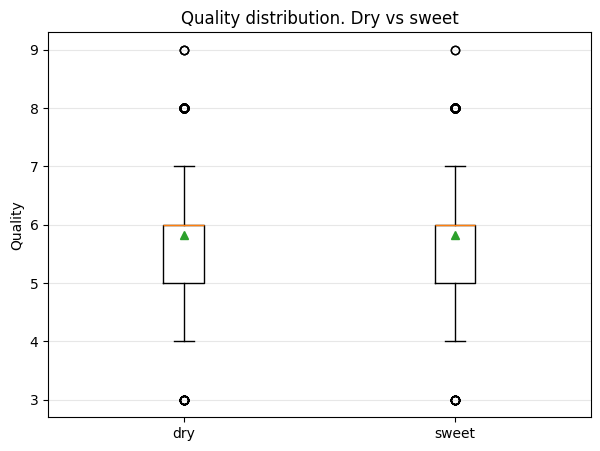

\Mann–whitney u test:
U-statistic: 5272265.0
p-value: 0.5833001301451017


In [20]:
#we create 2 new categories based on sweetness or dryness
threshold = 4.0
df['sweetness'] = df['residual sugar'].apply(lambda x: 'sweet' if x >= threshold else 'dry')

print(df['sweetness'].value_counts())

#trying to find the mean of the variable quality
mean_dry = df.loc[df['sweetness'] == 'dry', 'quality'].mean()
mean_sweet = df.loc[df['sweetness'] == 'sweet', 'quality'].mean()

print("Mean quality for dry:", mean_dry)
print("Mean quality for sweet:", mean_sweet)

#making a box plot to compare
plt.figure(figsize=(7,5))
plt.boxplot(
    [df.loc[df['sweetness']=='dry','quality'],
     df.loc[df['sweetness']=='sweet','quality']],
    labels=['dry','sweet'],
    showmeans=True
)
plt.ylabel("Quality")
plt.title("Quality distribution. Dry vs sweet")
plt.grid(axis='y', alpha=0.3)
plt.show()

#using again the mann–whitney u test
dry_quality = df.loc[df['sweetness']=='dry','quality']
sweet_quality = df.loc[df['sweetness']=='sweet','quality']

u_stat, p_value = mannwhitneyu(dry_quality, sweet_quality, alternative='two-sided')

print("\Mann–whitney u test:")
print("U-statistic:", u_stat)
print("p-value:", p_value)


Η μέση τιμή της ποιότητας βγήκε στα κρασιά ως εξής: Το ξηρό σχεδόν 5.818, ενώ το γλυκό 5.817. Παρατηρούμε πως είναι σχεδόν το ίδιο. Με βάση το box plot βλέπουμε πωως οι μέσοι και τα εύρη είναι επίσης παρόμοια. Τέλος, με τον στατιστικό έλεγχο που κάναμε βρήκαμε το p value να είναι 0,583, γεγονός που σημαίνει ότι δεν υπάρχει στατιστικά σημαντική διαφορά στην ποιότητα μεταξύ ξηρού και γλυκού κρασιού. Οπότε η ποιότητα δεν επηρεάζεται από την residual sugar.

Ερώτημα 4 και 5

In [21]:
# our target is quality
y = df["quality"].to_numpy()

#we want to make our categorical variables into one hot encoding
X = pd.get_dummies(df.drop(columns=["quality"]), drop_first=True)

#making numpy array
X = X.to_numpy()

print("X shape is:", X.shape)
print("y shape is:", y.shape)

#we do the train test split now with 90-10 and seed 0
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.10,
    random_state=0
)

#training our decision tree regressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

#MAE
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE on test set:", mae)


X shape is: (6497, 13)
y shape is: (6497,)
MAE on test set: 0.4492307692307692


Βρήκαμε ΜΑΕ 0,449 που σημαίνει ότι κάνει λάθος 0,4 σε μια κλίμακα μέχρι το δέκα. Οπότε μισή μονάδα δηλάδή.

Ερώτημα 6

In [25]:
# we create a list for our mae scores
mae_scores = []

# we repeat our split train test for seeds 0-9
for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.10,
        random_state=seed
    )

    #we train our model once again
    model = DecisionTreeRegressor(random_state=0)
    model.fit(X_train, y_train)

    #finding mae scores
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    print(f"for seed {seed} the MAE is: {mae:.4f}")

# finding the mean and std
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

print("MAE scores:", mae_scores)
print(f"Mean MAE: {mean_mae:.4f}")
print(f"Std MAE: {std_mae:.4f}")


for seed 0 the MAE is: 0.4492
for seed 1 the MAE is: 0.5277
for seed 2 the MAE is: 0.4508
for seed 3 the MAE is: 0.4708
for seed 4 the MAE is: 0.4938
for seed 5 the MAE is: 0.4400
for seed 6 the MAE is: 0.4754
for seed 7 the MAE is: 0.4354
for seed 8 the MAE is: 0.4308
for seed 9 the MAE is: 0.4800
MAE scores: [0.4492307692307692, 0.5276923076923077, 0.45076923076923076, 0.4707692307692308, 0.4938461538461538, 0.44, 0.4753846153846154, 0.43538461538461537, 0.4307692307692308, 0.48]
Mean MAE: 0.4654
Std MAE: 0.0287


Το MAΕ έχει μέση τιμή 0,46 και τυπική απόκλιση 0,02. Αυτό σημαίνει ότι δεν αλλάζει σημαντικά με τους διαφορετικούς διαχωρισμούς που κάναμε και έχει σταθερή απόδοση, οπότε είναι αξιόπιστο.

Ερώτημα 7

In [27]:
feature_df = pd.get_dummies(df.drop(columns=["quality"]), drop_first=True)
feature_names = feature_df.columns.tolist()

# we split the xtrain into train/validation 80-20 so we finally have 70/20/10
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=0
)

print("Shapes are: X_train_full:", X_train_full.shape, "X_val is:", X_val.shape, "X_test is:", X_test.shape)

#we put 15 combinations of hyperparameter. I chose to alter the max depth, min samples split and min samples leaf
param_grid = [
    {"max_depth": 3, "min_samples_split": 2, "min_samples_leaf": 1},
    {"max_depth": 3, "min_samples_split": 5, "min_samples_leaf": 2},
    {"max_depth": 3, "min_samples_split": 10, "min_samples_leaf": 4},
    {"max_depth": 5, "min_samples_split": 2, "min_samples_leaf": 1},
    {"max_depth": 5, "min_samples_split": 5, "min_samples_leaf": 2},
    {"max_depth": 5, "min_samples_split": 10, "min_samples_leaf": 4},
    {"max_depth": 7, "min_samples_split": 2, "min_samples_leaf": 1},
    {"max_depth": 7, "min_samples_split": 5, "min_samples_leaf": 2},
    {"max_depth": 7, "min_samples_split": 10, "min_samples_leaf": 4},
    {"max_depth": None, "min_samples_split": 2, "min_samples_leaf": 1},
    {"max_depth": None, "min_samples_split": 5, "min_samples_leaf": 2},
    {"max_depth": None, "min_samples_split": 10, "min_samples_leaf": 4},
    {"max_depth": 4, "min_samples_split": 3, "min_samples_leaf": 1},
    {"max_depth": 6, "min_samples_split": 3, "min_samples_leaf": 2},
    {"max_depth": 8, "min_samples_split": 4, "min_samples_leaf": 3},
]

results = []
for i, params in enumerate(param_grid):
    model = DecisionTreeRegressor(random_state=0,
                                  max_depth=params["max_depth"],
                                  min_samples_split=params["min_samples_split"],
                                  min_samples_leaf=params["min_samples_leaf"])
    model.fit(X_train_full, y_train_full)
    y_train_pred = model.predict(X_train_full)
    y_val_pred = model.predict(X_val)
    mae_train = mean_absolute_error(y_train_full, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    results.append({
        "idx": i,
        "parameters": params,
        "mae_train": mae_train,
        "mae_val": mae_val
    })
    print(f"Combination {i}: parameters={params} the MAE train={mae_train:.4f} and the MAE value={mae_val:.4f}")

results_df = pd.DataFrame(results).sort_values("mae_val")
print("The highest 3 by validation MAE:")
print(results_df.head(3))


Shapes are: X_train_full: (4677, 13) X_val is: (1170, 13) X_test is: (650, 13)
Combination 0: parameters={'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1} the MAE train=0.5849 and the MAE value=0.6095
Combination 1: parameters={'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 2} the MAE train=0.5849 and the MAE value=0.6095
Combination 2: parameters={'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 4} the MAE train=0.5849 and the MAE value=0.6095
Combination 3: parameters={'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1} the MAE train=0.5461 and the MAE value=0.5962
Combination 4: parameters={'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2} the MAE train=0.5452 and the MAE value=0.5959
Combination 5: parameters={'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4} the MAE train=0.5438 and the MAE value=0.5983
Combination 6: parameters={'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1} the MAE train

Σύμφωνα με τον κώδικα που γράψαμε παραπάνω, ο καλύτερος συνδυασμός έιναι αυτός που έχει μικρότερο mae value, δηλαδή ο 9ος σε μας.
Αν έχουμε mae train πολυ μικρό και mae value μεγάλο τότε το μοντέλο μας κάνει overfitting, κάτι που δεν θέλουμε σε καμία περίπτωση. Αν όμως και τα δύο, mae train mae value είναι πολύ μεγάλα τότε το μοντέλο κα΄νει underfitting.

Ερώτημα 8

Πιο αξιόπιστο σύνολο για την επιλογή υπερπαραμέτρων είναι το validation set. Αυτό γιατί το train set το χρησιμοποιούμε όταν εκπαιδεύουμε το μοντέλο και είναι πιθανο να προσαρμοστεί στα δεδομένα, ενώ το validatio set δεν συμμετείχε καθόλου στην εκπαίδευση οπότε δεν κάνει κάτι τέτοιο και εκτιμά καλύτερα πως συμπεριφέρονται οι υπερπαράμετροι στα άγνωστα δεδομένα.

Ερώτημα 9

In [35]:
param_grid_cv = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

base_model = DecisionTreeRegressor(random_state=0)

grid = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid_cv,
    scoring="neg_mean_absolute_error",
    cv=10,
    n_jobs=-1,
    return_train_score=True
)

#we use the data from exercise 4
grid.fit(X_train, y_train)
print("the best parameters are:", grid.best_params_)
print("the best CV score is:", grid.best_score_)


the best parameters are: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
the best CV score is: -0.4898226203020723


Η ΜΑΕ περιμέναμε να βγει αρνητική, αλλά μπορούμε κάλλιστα να κρατήσουμε την απόλυτη τιμή της. Οπότε είναι 0.489.

Ερώτημα 10

In [36]:
best_model = grid.best_estimator_
y_test_pred_best = best_model.predict(X_test)
mae_test_best = mean_absolute_error(y_test, y_test_pred_best)
print("The MAE on test set is:", mae_test_best)


The MAE on test set is: 0.48


Στο ερώτημα 6 η επανάληψη με πολλά seeds εκτιμά το πόσο ποικίλη ειναι η απόδοση όταν αλλάζουμε τα splits. Δεν είναι καλύτερη όμως από την διαδικασία επιλογής υπερπαραμέτρων. Στο ερώτημα 7 με το train valdation split and tuning, μπορεί να οδηγήσει σε τυχαίο αποτέλεσμα. Τέλος, το ερώτημα 9, θεωρείται πιο αξιόπιστο για να διαλέξουμε υπερπαραμετρους γιατί αξιολογείται η απόδοση πολλές φορές και μας γυρίζει μια μέση εκτίμηση.

Ερώτημα 11